# 1. 데이터 탐색: 단변량

In [1]:
import pandas as pd
data=pd.read_csv('Ex_CEOSalary.csv', encoding='utf-8')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


In [3]:
data.head()

salary         sales   roe  industry
0    1095  27595.000000  14.1         1
1    1001   9958.000000  10.9         1
2    1122   6125.899902  23.5         1
3     578  16246.000000   5.9         1
4    1368  21783.199219  13.8         1

## 1-1. 범주형 자료의 탐색

In [4]:
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [5]:
data['industry'] = data['industry'].replace([1,2,3,4], ['Service', 'IT', 'Finance', 'Others'])
data['industry'].value_counts()

Service    72
Finance    60
IT         46
Others     31
Name: industry, dtype: int64

<AxesSubplot:ylabel='industry'>

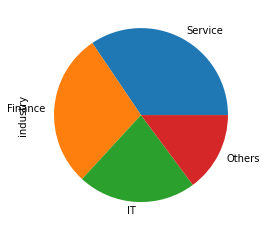

In [6]:
%matplotlib inline
data['industry'].value_counts().plot(kind="pie")

<AxesSubplot:>

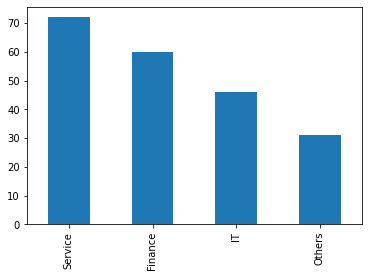

In [7]:
data['industry'].value_counts().plot(kind="bar")

## 1-2. 연속형 자료의 탐색

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 6.7+ KB


In [9]:
data.describe()

salary         sales         roe
count    209.000000    209.000000  209.000000
mean    1281.119617   6923.793282   17.184211
std     1372.345308  10633.271088    8.518509
min      223.000000    175.199997    0.500000
25%      736.000000   2210.300049   12.400000
50%     1039.000000   3705.199951   15.500000
75%     1407.000000   7177.000000   20.000000
max    14822.000000  97649.898438   56.299999

In [10]:
data.skew()

salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

In [11]:
data.kurtosis()

salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

### pandas 제공 기술통계 함수 

- count:  NA 값을 제외한 값의 수를 반환 
- describe:  시리즈 혹은 데이터프레임의 각 열에 대한 기술 통계 

- min, max: 최소, 최대값 
- argmin, argmax:  최소, 최대값을 갖고 있는 색인 위치 반환 
- idxmin, idxmanx:  최소 최대값 갖고 있는 색인의 값 반환 
- quantile:  0부터 1까지의 분위수 계산 
- sum: 합 
- mean: 평균 
- median: 중위값 
- mad: 평균값에서 절대 평균편차 
- var: 표본 분산 
- std: 표본 정규분산 
- skew: 표본 비대칭도 
- kurt: 표본 첨도 
- cumsum: 누적 합 
- cummin, cummax: 누적 최소값, 누적 최대값 
- cumprod: 누적 곱 
- diff: 1차 산술차 (시계열 데이터 사용시 유용) 
- pct_change: 퍼센트 변화율 계산 
- corr: 데이터프레임의 모든 변수 간 상관관계 계산하여 반환
- cov: 데이터프레임의 모든 변수 간 공분산을 계산하여 반환

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

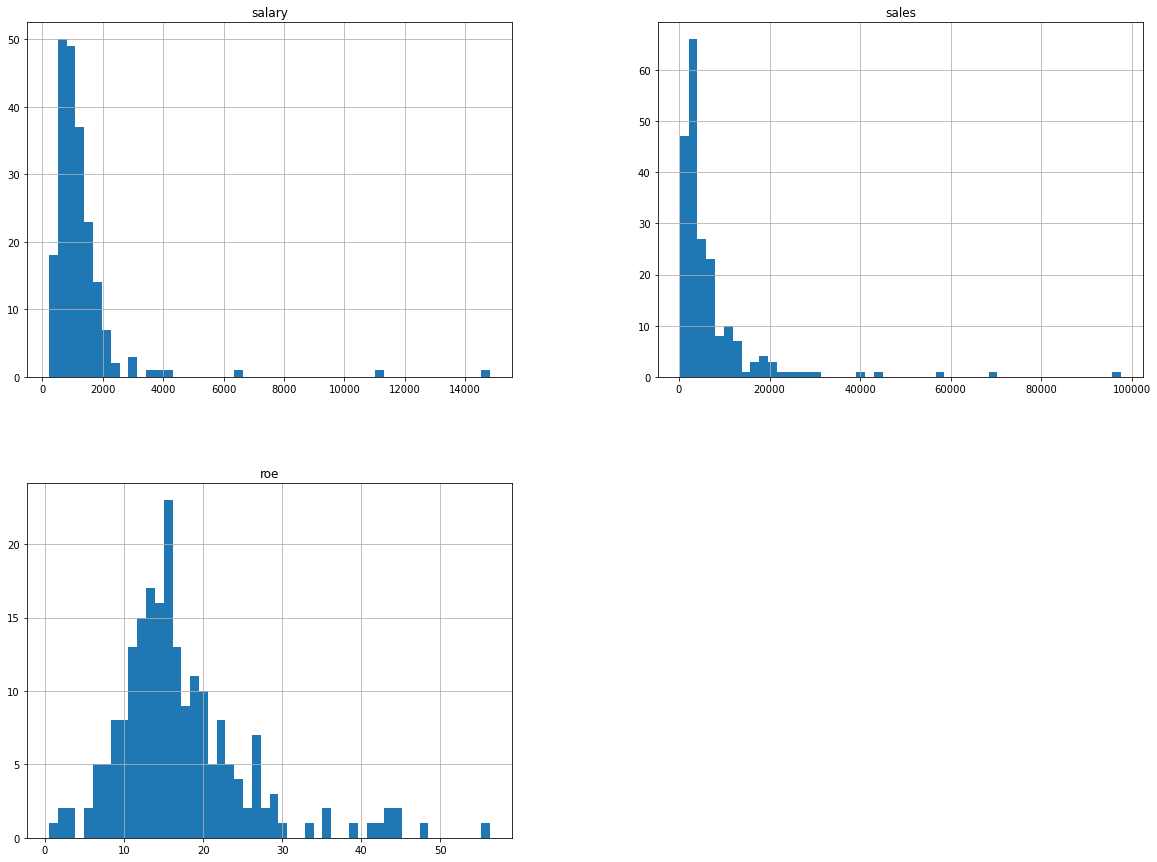

In [12]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

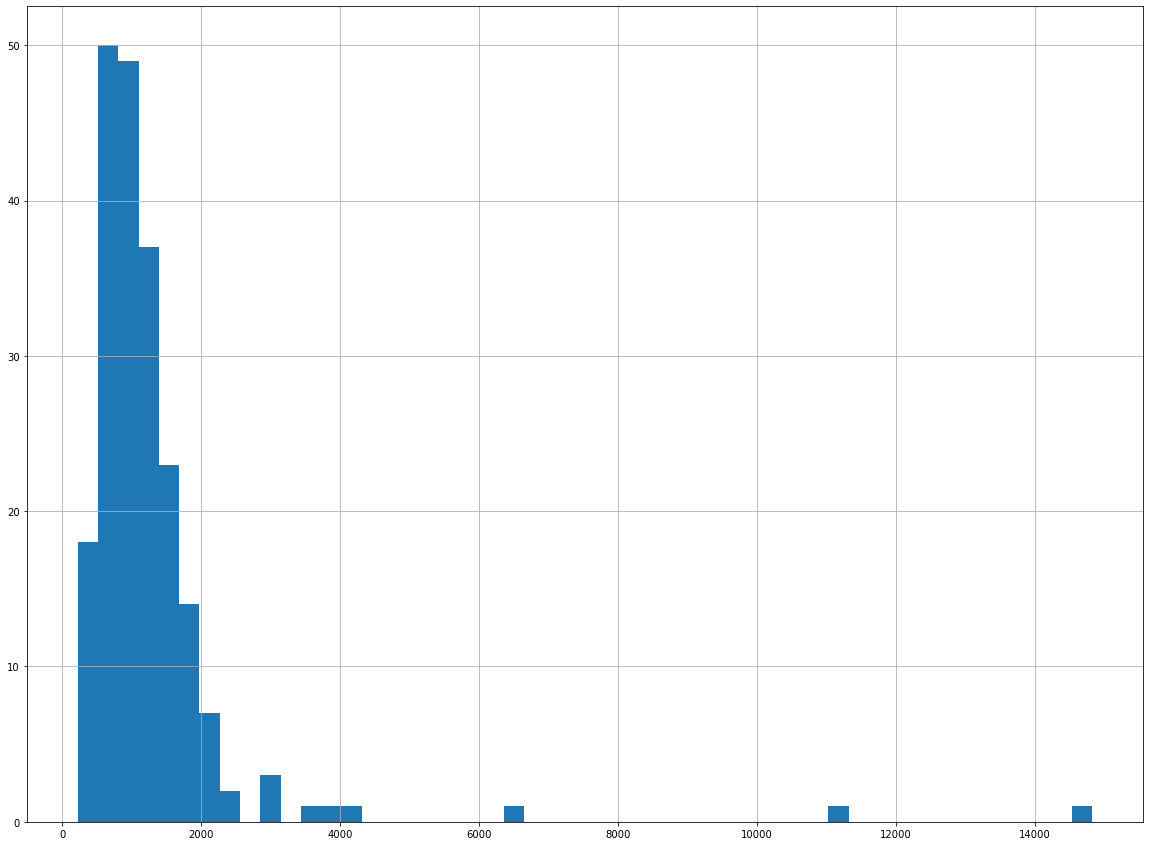

In [13]:
data['salary'].hist(bins=50, figsize=(20,15))

<AxesSubplot:>

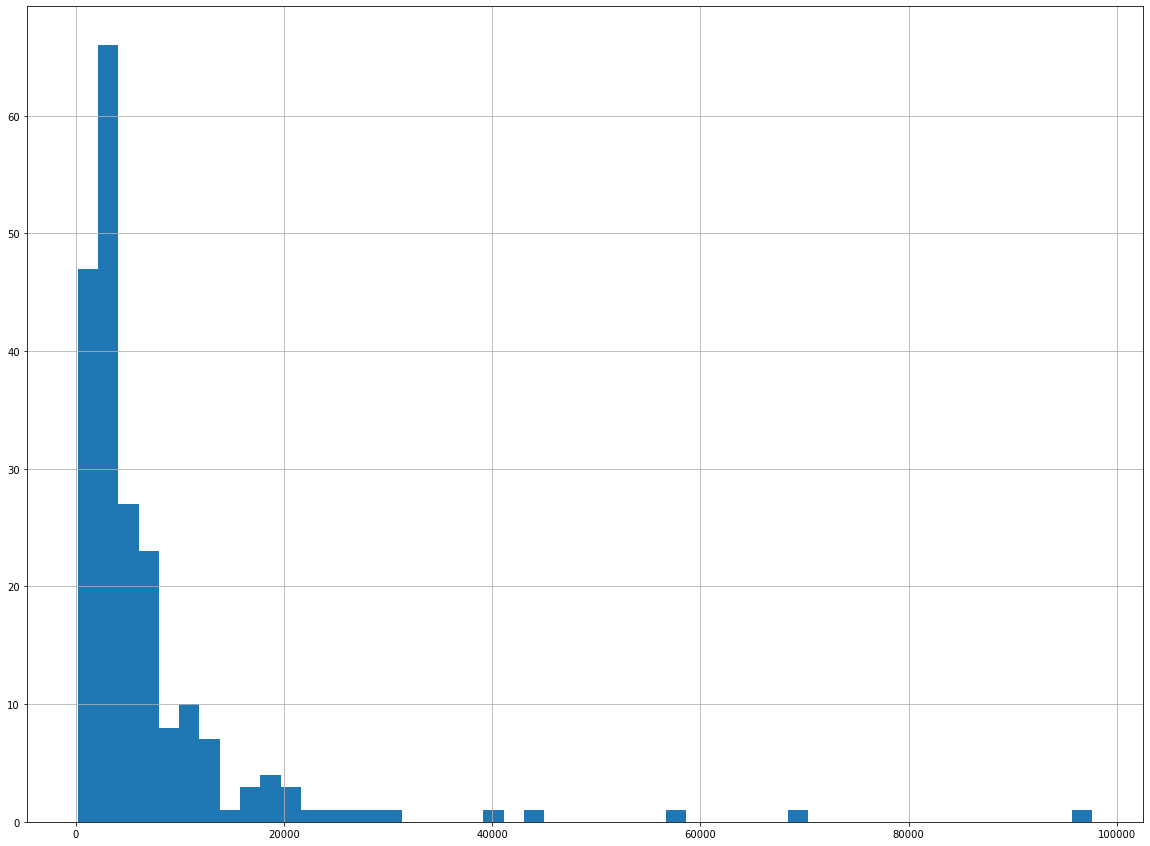

In [14]:
data['sales'].hist(bins=50, figsize=(20,15))

# 2. 데이터 탐색: 이변량

In [15]:
data.corr()

salary     sales       roe
salary  1.000000  0.119869  0.114842
sales   0.119869  1.000000 -0.055386
roe     0.114842 -0.055386  1.000000

In [16]:
data.corr(method="pearson")

salary     sales       roe
salary  1.000000  0.119869  0.114842
sales   0.119869  1.000000 -0.055386
roe     0.114842 -0.055386  1.000000

In [17]:
data.corr(method="spearman")

salary     sales       roe
salary  1.000000  0.528016  0.205984
sales   0.528016  1.000000 -0.170548
roe     0.205984 -0.170548  1.000000

In [18]:
data.corr(method="kendall")

salary     sales       roe
salary  1.000000  0.363921  0.143672
sales   0.363921  1.000000 -0.123844
roe     0.143672 -0.123844  1.000000

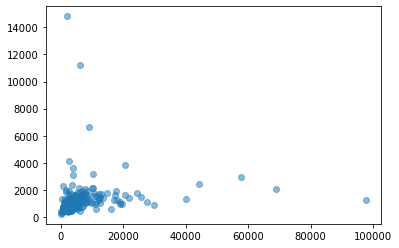

In [19]:
import matplotlib.pyplot as plt
plt.scatter(data['sales'], data['salary'], alpha=0.5)
plt.show()

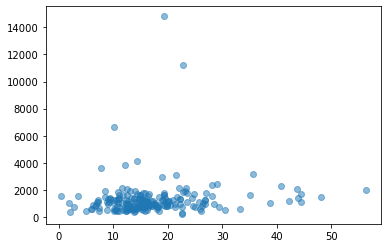

In [20]:
plt.scatter(data['roe'], data['salary'], alpha=0.5)
plt.show()

In [21]:
data.groupby('industry')[['salary']].describe()

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
Finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
IT         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
Others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
Service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
Finance   14822.0  
IT         6640.0  
Others     1100.0  
Service    3844.0

# 3. 이상치 처리

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000001AC3FC60130>, <matplotlib.lines.Line2D object at 0x000001AC3FC60490>], 'caps': [<matplotlib.lines.Line2D object at 0x000001AC3FC60820>, <matplotlib.lines.Line2D object at 0x000001AC3FC60B80>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001AC3FC50D90>], 'medians': [<matplotlib.lines.Line2D object at 0x000001AC3FC60EE0>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001AC3FC6D280>], 'means': []})

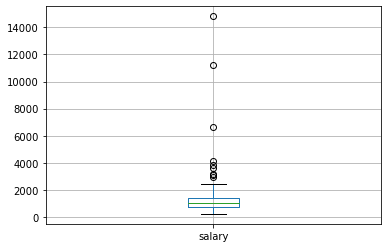

In [22]:
data.boxplot(column='salary', return_type='both')

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000001AC3FCC8EB0>, <matplotlib.lines.Line2D object at 0x000001AC3FCD8250>], 'caps': [<matplotlib.lines.Line2D object at 0x000001AC3FCD85B0>, <matplotlib.lines.Line2D object at 0x000001AC3FCD8910>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001AC3FCC8B20>], 'medians': [<matplotlib.lines.Line2D object at 0x000001AC3FCD8C70>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001AC3FCD8FD0>], 'means': []})

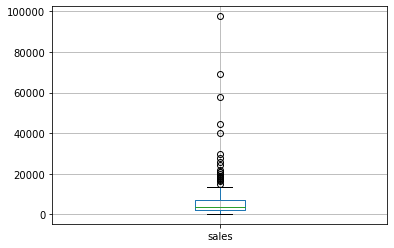

In [23]:
data.boxplot(column='sales', return_type='both')

Boxplot(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x000001AC3FD27BE0>, <matplotlib.lines.Line2D object at 0x000001AC3FD27F40>], 'caps': [<matplotlib.lines.Line2D object at 0x000001AC3FD352E0>, <matplotlib.lines.Line2D object at 0x000001AC3FD35640>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001AC3FD27880>], 'medians': [<matplotlib.lines.Line2D object at 0x000001AC3FD35A00>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001AC3FD35D60>], 'means': []})

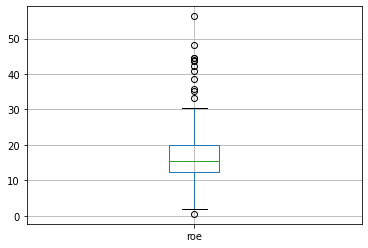

In [24]:
data.boxplot(column='roe', return_type='both')

## 3-1. salary 변수 이상치 처리

In [25]:
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary-Q1_salary
IQR_salary

671.0

In [26]:
data_IQR=data[(data['salary']<Q3_salary+IQR_salary*1.5)& (data['salary']>Q1_salary-IQR_salary*1.5)] 

<AxesSubplot:>

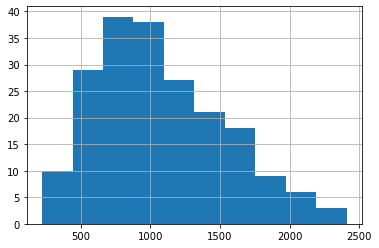

In [27]:
data_IQR['salary'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

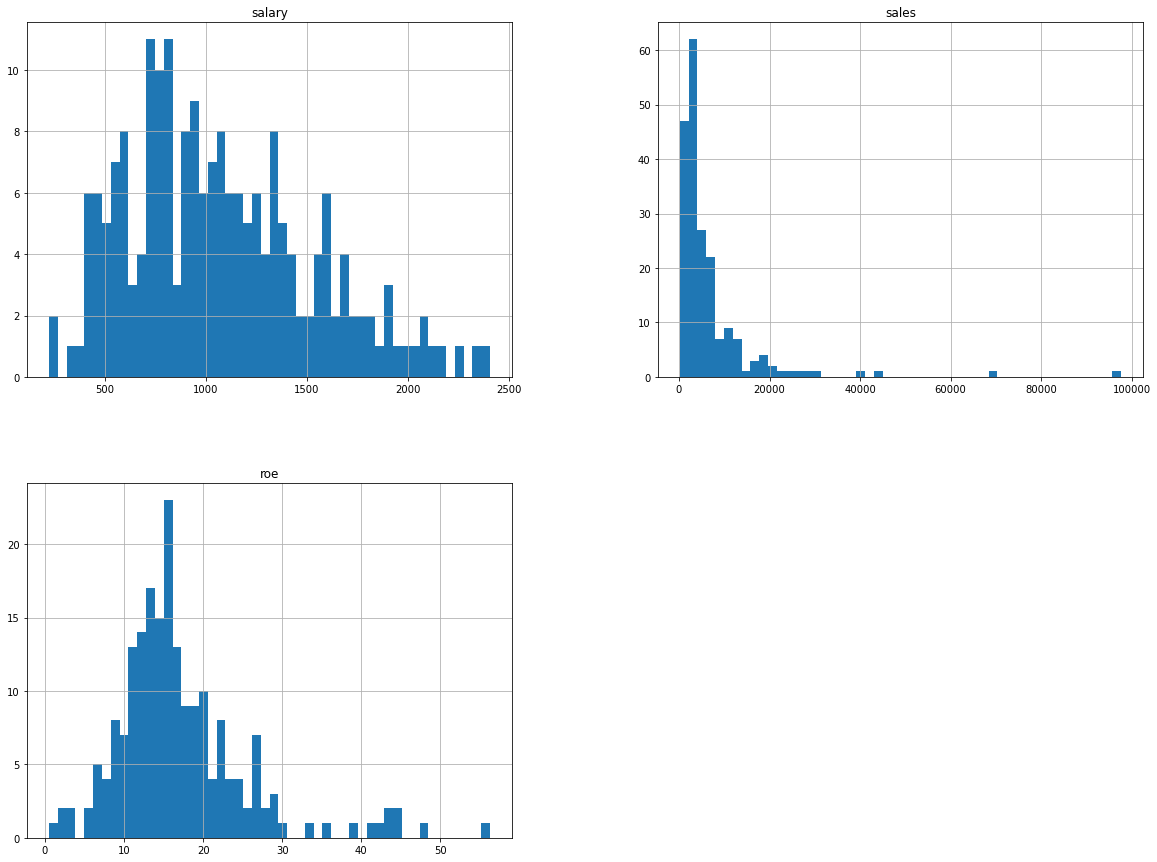

In [28]:
data_IQR.hist(bins=50, figsize=(20,15))

In [29]:
data_IQR.corr()

salary     sales       roe
salary  1.000000  0.335446  0.289704
sales   0.335446  1.000000 -0.065034
roe     0.289704 -0.065034  1.000000

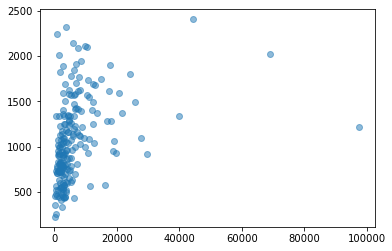

In [30]:
import matplotlib.pyplot as plt
plt.scatter(data_IQR['sales'], data_IQR['salary'], alpha=0.5)
plt.show()

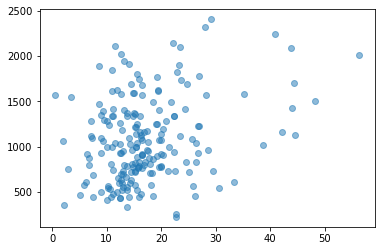

In [31]:
plt.scatter(data_IQR['roe'], data_IQR['salary'], alpha=0.5)
plt.show()

## 3-2. sales 변수 이상치 처리

In [32]:
Q1_sales = data['sales'].quantile(q=0.25)
Q3_sales = data['sales'].quantile(q=0.75)
IQR_sales = Q3_sales-Q1_sales
IQR_sales

4966.6999511718695

In [33]:
data_IQR=data[(data['sales']<Q3_sales+IQR_sales*1.5)& (data['sales']>Q1_sales-IQR_sales*1.5) &
              (data['salary']<Q3_salary+IQR_salary*1.5)& (data['salary']>Q1_salary-IQR_salary*1.5)]

<AxesSubplot:>

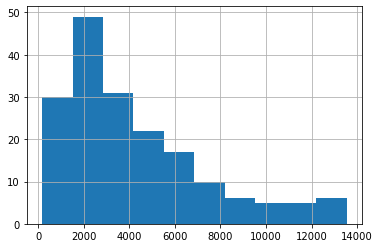

In [34]:
data_IQR['sales'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

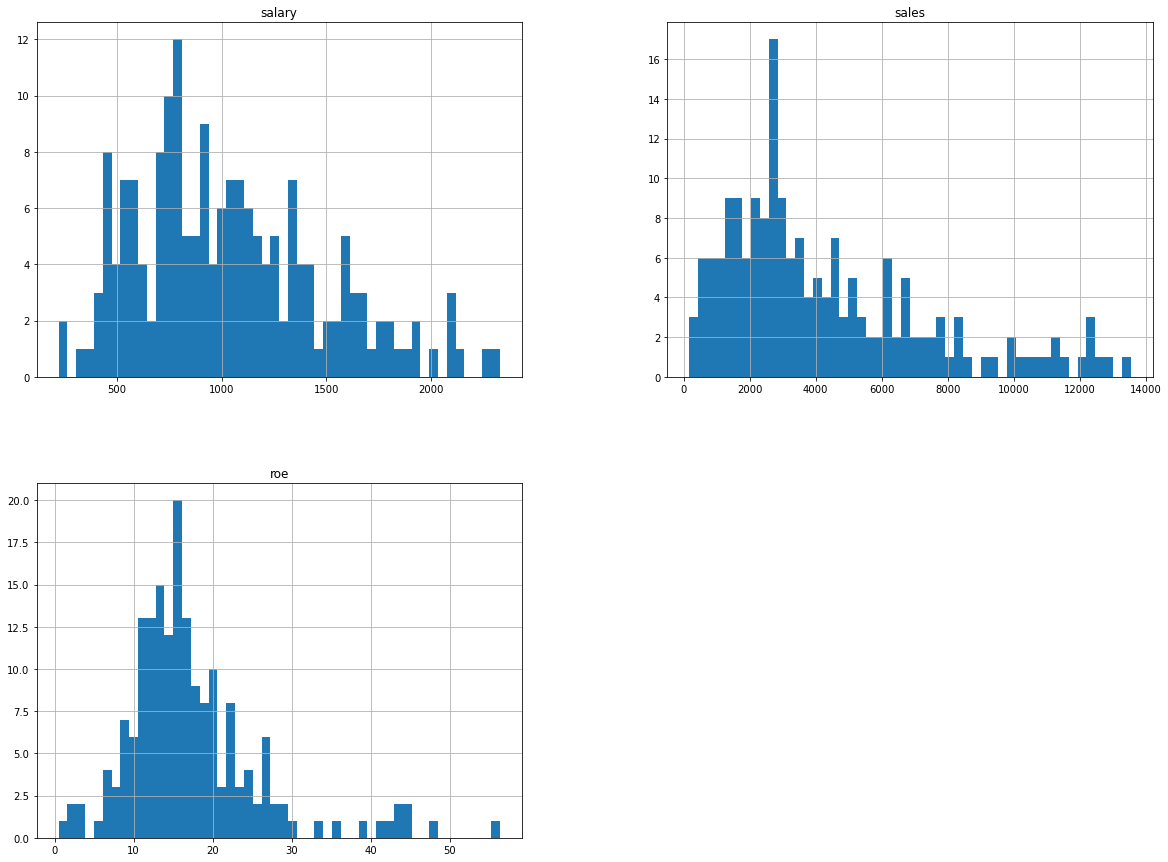

In [35]:
data_IQR.hist(bins=50, figsize=(20,15))

In [36]:
data_IQR.corr()

salary     sales       roe
salary  1.000000  0.471278  0.299153
sales   0.471278  1.000000 -0.076046
roe     0.299153 -0.076046  1.000000

# 4. 변수 변환

## 4-1. log 변환

In [37]:
import numpy as np
data['log_salary']=np.log(data['salary'])
data['log_sales']=np.log(data['sales'])
data['log_roe']=np.log(data['roe'])

In [38]:
data.head()

salary         sales   roe industry  log_salary  log_sales   log_roe
0    1095  27595.000000  14.1  Service    6.998510  10.225390  2.646175
1    1001   9958.000000  10.9  Service    6.908755   9.206132  2.388763
2    1122   6125.899902  23.5  Service    7.022868   8.720281  3.157000
3     578  16246.000000   5.9  Service    6.359574   9.695602  1.774952
4    1368  21783.199219  13.8  Service    7.221105   9.988894  2.624669

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'log_salary'}>],
       [<AxesSubplot:title={'center':'log_sales'}>,
        <AxesSubplot:title={'center':'log_roe'}>]], dtype=object)

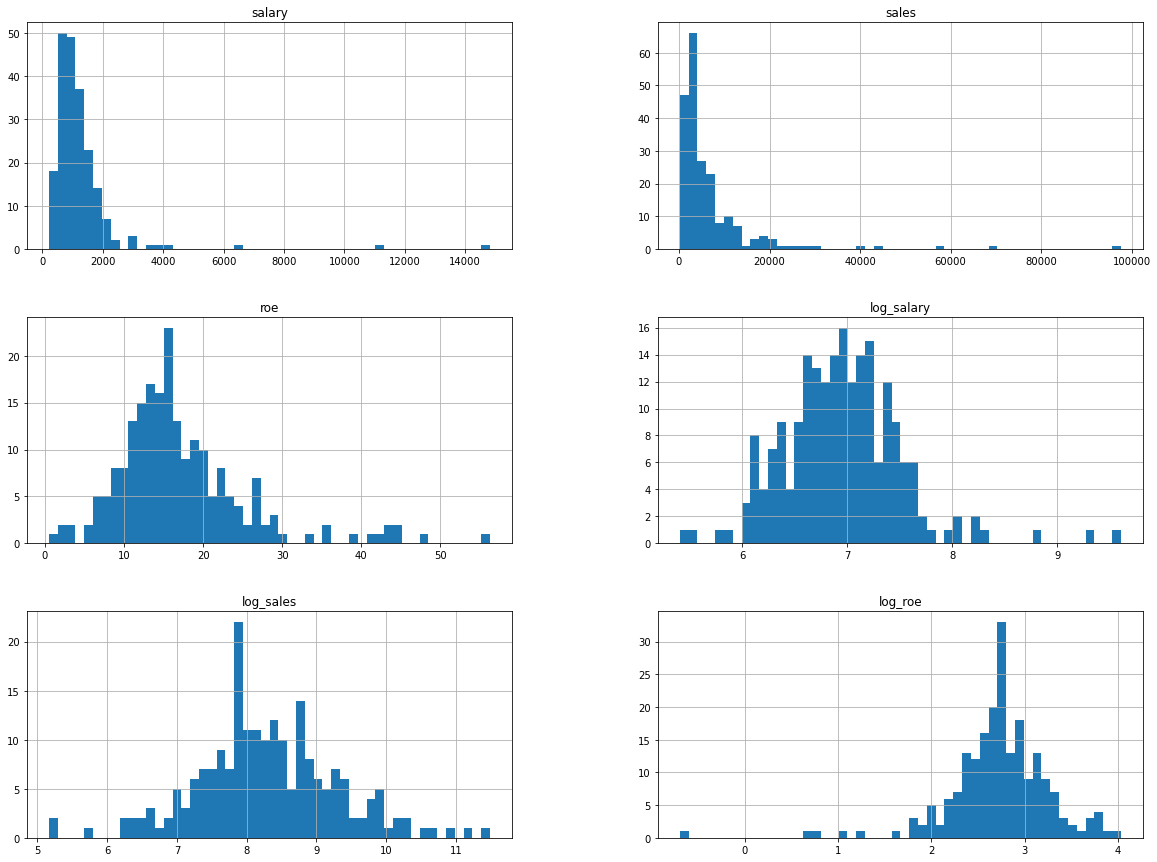

In [39]:
data.hist(bins=50, figsize=(20,15))

In [40]:
data.corr()

salary     sales       roe  log_salary  log_sales   log_roe
salary      1.000000  0.119869  0.114842    0.794208   0.194092  0.101526
sales       0.119869  1.000000 -0.055386    0.281286   0.742921 -0.041004
roe         0.114842 -0.055386  1.000000    0.208499  -0.122553  0.873419
log_salary  0.794208  0.281286  0.208499    1.000000   0.459148  0.163548
log_sales   0.194092  0.742921 -0.122553    0.459148   1.000000 -0.120642
log_roe     0.101526 -0.041004  0.873419    0.163548  -0.120642  1.000000

## 4-2. 제곱근 변환

In [41]:
data['sqrt_salary']=np.sqrt(data['salary'])
data['sqrt_sales']=np.sqrt(data['sales'])
data['sqrt_roe']=np.sqrt(data['roe'])

In [42]:
data.head()

salary         sales   roe industry  log_salary  log_sales   log_roe  \
0    1095  27595.000000  14.1  Service    6.998510  10.225390  2.646175   
1    1001   9958.000000  10.9  Service    6.908755   9.206132  2.388763   
2    1122   6125.899902  23.5  Service    7.022868   8.720281  3.157000   
3     578  16246.000000   5.9  Service    6.359574   9.695602  1.774952   
4    1368  21783.199219  13.8  Service    7.221105   9.988894  2.624669   

   sqrt_salary  sqrt_sales  sqrt_roe  
0    33.090784  166.117428  3.754997  
1    31.638584   99.789779  3.301515  
2    33.496268   78.268128  4.847680  
3    24.041631  127.459798  2.428992  
4    36.986484  147.591325  3.714835

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'roe'}>],
       [<AxesSubplot:title={'center':'log_salary'}>,
        <AxesSubplot:title={'center':'log_sales'}>,
        <AxesSubplot:title={'center':'log_roe'}>],
       [<AxesSubplot:title={'center':'sqrt_salary'}>,
        <AxesSubplot:title={'center':'sqrt_sales'}>,
        <AxesSubplot:title={'center':'sqrt_roe'}>]], dtype=object)

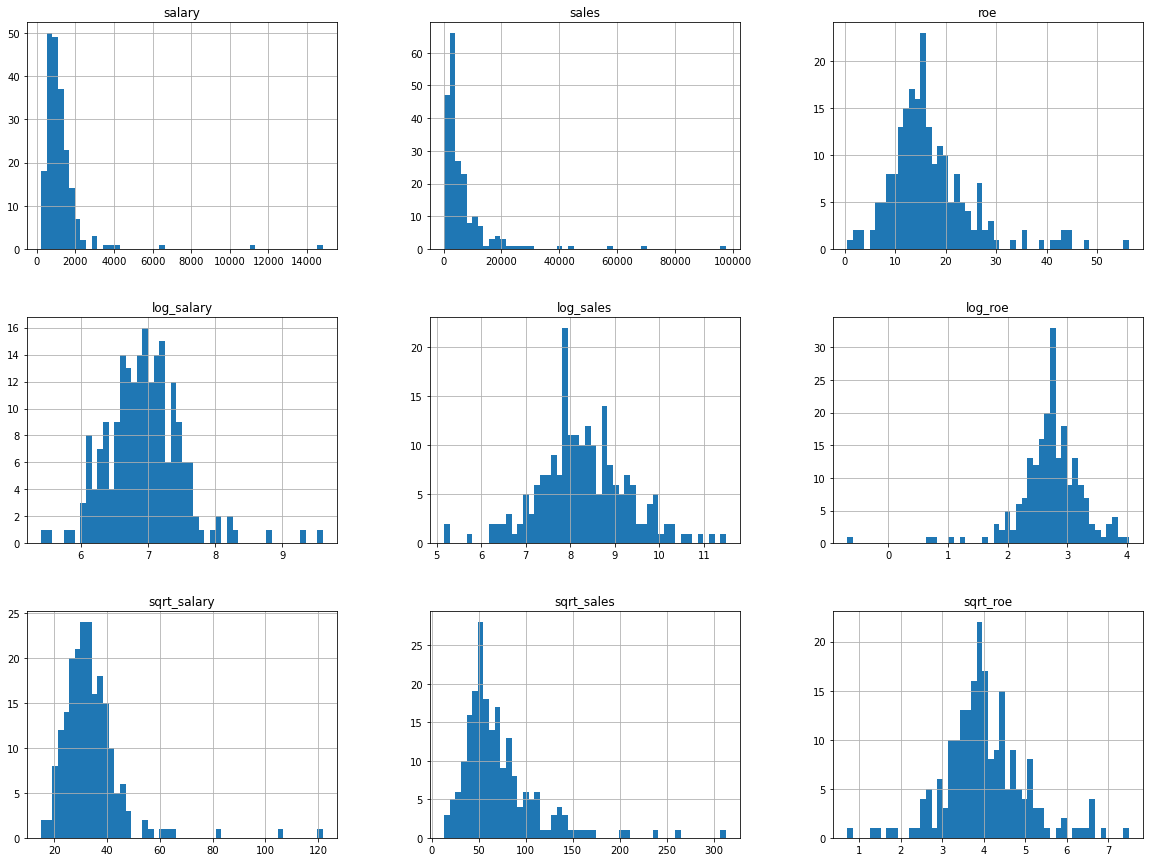

In [43]:
data.hist(bins=50, figsize=(20,15))

In [44]:
data.corr()

salary     sales       roe  log_salary  log_sales   log_roe  \
salary       1.000000  0.119869  0.114842    0.794208   0.194092  0.101526   
sales        0.119869  1.000000 -0.055386    0.281286   0.742921 -0.041004   
roe          0.114842 -0.055386  1.000000    0.208499  -0.122553  0.873419   
log_salary   0.794208  0.281286  0.208499    1.000000   0.459148  0.163548   
log_sales    0.194092  0.742921 -0.122553    0.459148   1.000000 -0.120642   
log_roe      0.101526 -0.041004  0.873419    0.163548  -0.120642  1.000000   
sqrt_salary  0.945732  0.215716  0.172327    0.946014   0.342422  0.139470   
sqrt_sales   0.164340  0.936282 -0.087687    0.386456   0.920797 -0.083308   
sqrt_roe     0.115219 -0.050538  0.977012    0.197914  -0.129020  0.953806   

             sqrt_salary  sqrt_sales  sqrt_roe  
salary          0.945732    0.164340  0.115219  
sales           0.215716    0.936282 -0.050538  
roe             0.172327   -0.087687  0.977012  
log_salary      0.946014    0.386456  0.197914  
log_sales       0.342422    0.920797 -0.129020  
log_roe         0.139470   -0.083308  0.953806  
sqrt_salary     1.000000    0.293173  0.165932  
sqrt_sales      0.293173    1.000000 -0.089501  
sqrt_roe        0.165932   -0.089501  1.000000

# 5. 결측치 처리

In [45]:
import pandas as pd
data=pd.read_csv('Ex_Missing.csv')
data

salary         sales        roe  industry
0  1095.0  27595.000000  14.100000         1
1     NaN   9958.000000  10.900000         1
2     NaN   6125.899902  23.500000         1
3   578.0  16246.000000   5.900000         1
4  1368.0           NaN  13.800000         1
5  1145.0           NaN  20.000000         2
6  1078.0   2266.699951  16.400000         2
7  1094.0   2966.800049  16.299999         2
8  1237.0   4570.200195  10.500000         2
9   833.0   2830.000000        NaN         2

## 5-1. 결측치 확인

### 가. 전체 및 변수별 결측 확인

In [46]:
# isnull(): 결측이면 True, 결측이 아니면 False 값 반환
pd.isnull(data)
data.isnull()

salary  sales    roe  industry
0   False  False  False     False
1    True  False  False     False
2    True  False  False     False
3   False  False  False     False
4   False   True  False     False
5   False   True  False     False
6   False  False  False     False
7   False  False  False     False
8   False  False  False     False
9   False  False   True     False

In [47]:
# notnull(): 결측이면 False, 결측이 아니면 True 값 반환
pd.notnull(data)
data.notnull()

salary  sales    roe  industry
0    True   True   True      True
1   False   True   True      True
2   False   True   True      True
3    True   True   True      True
4    True  False   True      True
5    True  False   True      True
6    True   True   True      True
7    True   True   True      True
8    True   True   True      True
9    True   True  False      True

In [48]:
# 변수(컬럼)별로 결측값 개수 확인: df.isnull().sum()
data.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64

In [49]:
# 특정 변수(컬럼)의 결측값 개수 확인: df.isnull().sum()
data['salary'].isnull().sum()

2

In [50]:
# 변수(컬럼)별로 결측 아닌 값의 개수 확인: df.notnull().sum()
data.notnull().sum()

salary       8
sales        8
roe          9
industry    10
dtype: int64

In [51]:
# 특정 변수(컬럼)의 결측 아닌 값의 개수 확인: df.notnull().sum()
data['salary'].notnull().sum()

8

### 나. 행별 결측 확인 및 저장

In [52]:
# 행(row) 단위로 결측값 개수 구하기 : df.isnull().sum(1)
data.isnull().sum(1)

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    1
dtype: int64

In [53]:
# 행(row) 단위로 결측값 개수 구해서 새변수 생성하기
data['missing']=data.isnull().sum(1)
data

salary         sales        roe  industry  missing
0  1095.0  27595.000000  14.100000         1        0
1     NaN   9958.000000  10.900000         1        1
2     NaN   6125.899902  23.500000         1        1
3   578.0  16246.000000   5.900000         1        0
4  1368.0           NaN  13.800000         1        1
5  1145.0           NaN  20.000000         2        1
6  1078.0   2266.699951  16.400000         2        0
7  1094.0   2966.800049  16.299999         2        0
8  1237.0   4570.200195  10.500000         2        0
9   833.0   2830.000000        NaN         2        1

In [54]:
# 행(row) 단위로 실측값 개수 구하기 : df.notnull().sum(1)
del data['missing']
data['valid']=data.notnull().sum(1)
data

salary         sales        roe  industry  valid
0  1095.0  27595.000000  14.100000         1      4
1     NaN   9958.000000  10.900000         1      3
2     NaN   6125.899902  23.500000         1      3
3   578.0  16246.000000   5.900000         1      4
4  1368.0           NaN  13.800000         1      3
5  1145.0           NaN  20.000000         2      3
6  1078.0   2266.699951  16.400000         2      4
7  1094.0   2966.800049  16.299999         2      4
8  1237.0   4570.200195  10.500000         2      4
9   833.0   2830.000000        NaN         2      3

## 5-2. 결측값 제거: dropna()

- 결측값이 있는 행 제거: delete row with missing values
- 결측값이 있는 열 제거: delete column with missing values
- 결측값이 있는 특정 행 또는 열 제거: delete specific row or column with missing values

### 가. 결측값 있는 행(row/case) 제거

In [55]:
data_del_row=data.dropna(axis=0)
data_del_row

salary         sales        roe  industry  valid
0  1095.0  27595.000000  14.100000         1      4
3   578.0  16246.000000   5.900000         1      4
6  1078.0   2266.699951  16.400000         2      4
7  1094.0   2966.800049  16.299999         2      4
8  1237.0   4570.200195  10.500000         2      4

### 나. 결측값 있는 열(column/variable) 제거

In [56]:
data_del_col=data.dropna(axis=1)
data_del_col

industry  valid
0         1      4
1         1      3
2         1      3
3         1      4
4         1      3
5         2      3
6         2      4
7         2      4
8         2      4
9         2      3

### 다. 결측값 있는 특정 행/열 제거

In [57]:
data[['salary']].dropna()

salary
0  1095.0
3   578.0
4  1368.0
5  1145.0
6  1078.0
7  1094.0
8  1237.0
9   833.0

In [58]:
data[['salary', 'sales', 'roe', 'industry']].dropna()

salary         sales        roe  industry
0  1095.0  27595.000000  14.100000         1
3   578.0  16246.000000   5.900000         1
6  1078.0   2266.699951  16.400000         2
7  1094.0   2966.800049  16.299999         2
8  1237.0   4570.200195  10.500000         2

In [59]:
data[['salary', 'sales', 'roe', 'industry']].dropna(axis=0)

salary         sales        roe  industry
0  1095.0  27595.000000  14.100000         1
3   578.0  16246.000000   5.900000         1
6  1078.0   2266.699951  16.400000         2
7  1094.0   2966.800049  16.299999         2
8  1237.0   4570.200195  10.500000         2

In [60]:
data[['salary', 'sales', 'roe', 'industry']].dropna(axis=1)

industry
0         1
1         1
2         1
3         1
4         1
5         2
6         2
7         2
8         2
9         2

## 5-3. 결측값 대체

- 결측값을 특정 값으로 대체: replace missing valeus with scalar value
- 결측값을 변수별 평균으로 대체: filling missing values with mean value per columns
- 결측값을 다른 변수의 값으로 대체: filling missing values with another columns' values
- 결측값을 그룹 평균값으로 대체: fill missing values by Group means

In [61]:
import pandas as pd
data=pd.read_csv('Ex_Missing.csv')
data

salary         sales        roe  industry
0  1095.0  27595.000000  14.100000         1
1     NaN   9958.000000  10.900000         1
2     NaN   6125.899902  23.500000         1
3   578.0  16246.000000   5.900000         1
4  1368.0           NaN  13.800000         1
5  1145.0           NaN  20.000000         2
6  1078.0   2266.699951  16.400000         2
7  1094.0   2966.800049  16.299999         2
8  1237.0   4570.200195  10.500000         2
9   833.0   2830.000000        NaN         2

### 가. 특정값으로 대체: df.fillna(value/string)

In [62]:
# 결측값을 0을 대체
data_0 = data.fillna(0)
data_0

salary         sales        roe  industry
0  1095.0  27595.000000  14.100000         1
1     0.0   9958.000000  10.900000         1
2     0.0   6125.899902  23.500000         1
3   578.0  16246.000000   5.900000         1
4  1368.0      0.000000  13.800000         1
5  1145.0      0.000000  20.000000         2
6  1078.0   2266.699951  16.400000         2
7  1094.0   2966.800049  16.299999         2
8  1237.0   4570.200195  10.500000         2
9   833.0   2830.000000   0.000000         2

In [63]:
# 결측값을 'missing' 문자로 대체
data_missing = data.fillna('missing')
data_missing

salary        sales        roe  industry
0   1095.0      27595.0       14.1         1
1  missing       9958.0       10.9         1
2  missing  6125.899902       23.5         1
3    578.0      16246.0        5.9         1
4   1368.0      missing       13.8         1
5   1145.0      missing       20.0         2
6   1078.0  2266.699951       16.4         2
7   1094.0  2966.800049  16.299999         2
8   1237.0  4570.200195       10.5         2
9    833.0       2830.0    missing         2

In [64]:
# 결측값을 앞 방향으로 채우기: df.fillna(method='ffill' or 'pad')
data_ffill=data.fillna(method='ffill')
data_ffill

salary         sales        roe  industry
0  1095.0  27595.000000  14.100000         1
1  1095.0   9958.000000  10.900000         1
2  1095.0   6125.899902  23.500000         1
3   578.0  16246.000000   5.900000         1
4  1368.0  16246.000000  13.800000         1
5  1145.0  16246.000000  20.000000         2
6  1078.0   2266.699951  16.400000         2
7  1094.0   2966.800049  16.299999         2
8  1237.0   4570.200195  10.500000         2
9   833.0   2830.000000  10.500000         2

In [65]:
# 결측값을 앞 방향으로 채우기: df.fillna(method='ffill' or 'pad')
data_pad=data.fillna(method='pad')
data_pad

salary         sales        roe  industry
0  1095.0  27595.000000  14.100000         1
1  1095.0   9958.000000  10.900000         1
2  1095.0   6125.899902  23.500000         1
3   578.0  16246.000000   5.900000         1
4  1368.0  16246.000000  13.800000         1
5  1145.0  16246.000000  20.000000         2
6  1078.0   2266.699951  16.400000         2
7  1094.0   2966.800049  16.299999         2
8  1237.0   4570.200195  10.500000         2
9   833.0   2830.000000  10.500000         2

In [66]:
# 결측값을 뒷 방향으로 채우기: df.fillna(method='bfill' or 'backfill')
data_bfill=data.fillna(method='bfill')
data_bfill

salary         sales        roe  industry
0  1095.0  27595.000000  14.100000         1
1   578.0   9958.000000  10.900000         1
2   578.0   6125.899902  23.500000         1
3   578.0  16246.000000   5.900000         1
4  1368.0   2266.699951  13.800000         1
5  1145.0   2266.699951  20.000000         2
6  1078.0   2266.699951  16.400000         2
7  1094.0   2966.800049  16.299999         2
8  1237.0   4570.200195  10.500000         2
9   833.0   2830.000000        NaN         2

In [67]:
# 결측값을 뒷 방향으로 채우기: df.fillna(method='bfill' or 'backfill')
data_backfill=data.fillna(method='backfill')
data_backfill

salary         sales        roe  industry
0  1095.0  27595.000000  14.100000         1
1   578.0   9958.000000  10.900000         1
2   578.0   6125.899902  23.500000         1
3   578.0  16246.000000   5.900000         1
4  1368.0   2266.699951  13.800000         1
5  1145.0   2266.699951  20.000000         2
6  1078.0   2266.699951  16.400000         2
7  1094.0   2966.800049  16.299999         2
8  1237.0   4570.200195  10.500000         2
9   833.0   2830.000000        NaN         2

### 나. 평균 대체: 
- df.fillna(df.mean())
- df.where(pd.notnull(df), df.mean(), axis='columns')

In [68]:
# 평균으로 대체
data_mean=data.fillna(data.mean())
data_mean

salary         sales        roe  industry
0  1095.0  27595.000000  14.100000         1
1  1053.5   9958.000000  10.900000         1
2  1053.5   6125.899902  23.500000         1
3   578.0  16246.000000   5.900000         1
4  1368.0   9069.825012  13.800000         1
5  1145.0   9069.825012  20.000000         2
6  1078.0   2266.699951  16.400000         2
7  1094.0   2966.800049  16.299999         2
8  1237.0   4570.200195  10.500000         2
9   833.0   2830.000000  14.600000         2

In [69]:
# 중위수로 대체
data_median=data.fillna(data.median())
data_median

salary         sales        roe  industry
0  1095.0  27595.000000  14.100000         1
1  1094.5   9958.000000  10.900000         1
2  1094.5   6125.899902  23.500000         1
3   578.0  16246.000000   5.900000         1
4  1368.0   5348.050049  13.800000         1
5  1145.0   5348.050049  20.000000         2
6  1078.0   2266.699951  16.400000         2
7  1094.0   2966.800049  16.299999         2
8  1237.0   4570.200195  10.500000         2
9   833.0   2830.000000  14.100000         2

In [70]:
# 최대/최소로 대체
data_max=data.fillna(data.max())
data_max

salary         sales        roe  industry
0  1095.0  27595.000000  14.100000         1
1  1368.0   9958.000000  10.900000         1
2  1368.0   6125.899902  23.500000         1
3   578.0  16246.000000   5.900000         1
4  1368.0  27595.000000  13.800000         1
5  1145.0  27595.000000  20.000000         2
6  1078.0   2266.699951  16.400000         2
7  1094.0   2966.800049  16.299999         2
8  1237.0   4570.200195  10.500000         2
9   833.0   2830.000000  23.500000         2

In [71]:
# 다른 변수 평균으로 대체
# salary 변수의 평균값으로 모든 결측값 대체
data_other_mean=data.fillna(data.mean()['salary'])
data_other_mean

salary         sales          roe  industry
0  1095.0  27595.000000    14.100000         1
1  1053.5   9958.000000    10.900000         1
2  1053.5   6125.899902    23.500000         1
3   578.0  16246.000000     5.900000         1
4  1368.0   1053.500000    13.800000         1
5  1145.0   1053.500000    20.000000         2
6  1078.0   2266.699951    16.400000         2
7  1094.0   2966.800049    16.299999         2
8  1237.0   4570.200195    10.500000         2
9   833.0   2830.000000  1053.500000         2

### 다. 다른 변수 값으로 대체

In [72]:
# sales의 결측값을 salary 값으로 대체
import numpy as np
data2=data.copy()
data2['sales_new'] = np.where(pd.notnull(data2['sales']) == True, data2['sales'], data2['salary'])
data2

salary         sales        roe  industry     sales_new
0  1095.0  27595.000000  14.100000         1  27595.000000
1     NaN   9958.000000  10.900000         1   9958.000000
2     NaN   6125.899902  23.500000         1   6125.899902
3   578.0  16246.000000   5.900000         1  16246.000000
4  1368.0           NaN  13.800000         1   1368.000000
5  1145.0           NaN  20.000000         2   1145.000000
6  1078.0   2266.699951  16.400000         2   2266.699951
7  1094.0   2966.800049  16.299999         2   2966.800049
8  1237.0   4570.200195  10.500000         2   4570.200195
9   833.0   2830.000000        NaN         2   2830.000000

### 라. 집단 평균값으로 대체

In [73]:
# 산업(industry)별 평균 확인
data.groupby('industry').mean()

salary         sales    roe
industry                                  
1         1013.666667  14981.224975  13.64
2         1077.400000   3158.425049  15.80

In [74]:
# lamda 함수 
fill_mean_func = lambda g: g.fillna(g.mean())

In [75]:
# lamda 함수의 apply() 적용
data_group_mean=data.groupby('industry').apply(fill_mean_func)
data_group_mean

salary         sales        roe  industry
industry                                                  
1        0  1095.000000  27595.000000  14.100000         1
         1  1013.666667   9958.000000  10.900000         1
         2  1013.666667   6125.899902  23.500000         1
         3   578.000000  16246.000000   5.900000         1
         4  1368.000000  14981.224975  13.800000         1
2        5  1145.000000   3158.425049  20.000000         2
         6  1078.000000   2266.699951  16.400000         2
         7  1094.000000   2966.800049  16.299999         2
         8  1237.000000   4570.200195  10.500000         2
         9   833.000000   2830.000000  15.800000         2

- 집단별 특정 값으로 대체

In [76]:
# 집단별로 변경할 값 설정
fill_values = {1: 1000, 2: 2000}

In [77]:
# lamda 함수 적용
fill_func = lambda d: d.fillna(fill_values[d.name])

In [78]:
# 집단별 apply
data_group_value=data.groupby('industry').apply(fill_func)
data_group_value

salary         sales          roe  industry
0  1095.0  27595.000000    14.100000         1
1  1000.0   9958.000000    10.900000         1
2  1000.0   6125.899902    23.500000         1
3   578.0  16246.000000     5.900000         1
4  1368.0   1000.000000    13.800000         1
5  1145.0   2000.000000    20.000000         2
6  1078.0   2266.699951    16.400000         2
7  1094.0   2966.800049    16.299999         2
8  1237.0   4570.200195    10.500000         2
9   833.0   2830.000000  2000.000000         2

- 변수별 다른 대체방법을 한번에 적용

In [79]:
missing_fill_val = {'salary': data.salary.interpolate(),
                    'sales': data.sales.mean(),
                    'roe': 'missing'}

In [80]:
print(missing_fill_val)

{'salary': 0    1095.000000
1     922.666667
2     750.333333
3     578.000000
4    1368.000000
5    1145.000000
6    1078.000000
7    1094.000000
8    1237.000000
9     833.000000
Name: salary, dtype: float64, 'sales': 9069.825012125, 'roe': 'missing'}


In [81]:
data_multi = data.fillna(missing_fill_val)
data_multi

salary         sales        roe  industry
0  1095.000000  27595.000000       14.1         1
1   922.666667   9958.000000       10.9         1
2   750.333333   6125.899902       23.5         1
3   578.000000  16246.000000        5.9         1
4  1368.000000   9069.825012       13.8         1
5  1145.000000   9069.825012       20.0         2
6  1078.000000   2266.699951       16.4         2
7  1094.000000   2966.800049  16.299999         2
8  1237.000000   4570.200195       10.5         2
9   833.000000   2830.000000    missing         2